<a href="https://colab.research.google.com/github/SumathiGit/Defect-Detection-Food-Package/blob/main/VGG16_DD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np

In [ ]:
img_zip_path = '/content/drive/My Drive/Defect_Detection_Dataset/Fastai_DD/Fastai_Defect_Detection_Img.zip'

In [ ]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall("Files")
zip_ref.close()

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 24kB/s 
     |████████████████████████████████| 4.0MB 35.4MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [ ]:
from fastai import *
from fastai.vision import *

import os
import sys
import requests
from io import BytesIO

In [ ]:
!ls

drive  Files  sample_data


In [ ]:
os.listdir('Files')

['Defect_Detection_Img']

In [ ]:
""" Creating DataBunch """

In [ ]:
tfms = get_transforms()

img_src = "Files"
src = (ImageList.from_folder(img_src) #set image folder
       .split_by_rand_pct(0.3) #set the split of training and validation to 70/30
       .label_from_folder(label_delim='_')) #get label names from folder and split by underscore (For more Labels)

data = (src.transform(tfms, size=256) #set image size to 256
        .databunch(num_workers=0).normalize(imagenet_stats))

Classes in our data: ['Beans', 'BeansDefected', 'BeansPerfect', 'Bevarage', 'Beverage', 'BeverageDefected', 'BeveragePerfect', 'BiscuitDefected', 'BiscuitPefect', 'Biscuits', 'Bottle', 'BottleDefected', 'BottlePerfect', 'Bread', 'BreadDefected', 'BreadPerfect', 'Cake', 'CakeDefected', 'CakePerfect', 'Candy', 'CandyDefected', 'CandyPerfect', 'Cans', 'CansDefected', 'CansPerfect', 'Cashews', 'CashewsDefected', 'CashewsPerfect', 'Cereal', 'CerealDefected', 'CerealPerfect', 'Chips', 'ChipsDefected', 'ChipsPack', 'ChipsPackDefected', 'ChipsPackPerfect', 'ChipsPerfect', 'Chocolate', 'ChocolateDefected', 'ChocolatePerfect', 'Cocktail', 'CocktailDefected', 'CocktailPerfect', 'CoolDrinks', 'CoolDrinksDefected', 'CoolDrinksPerfect', 'Corn', 'CornDefected', 'CornPerfect', 'Dates', 'DatesDefected', 'DatesPerfect', 'DriedMango', 'DriedMangoDefected', 'DriedMangoPerfect', 'Drinks', 'DrinksDefected', 'DrinksPerfect', 'Fish', 'FishDefected', 'FishPerfect', 'Flakes', 'FlakesDefected', 'FlakesPerfect', 

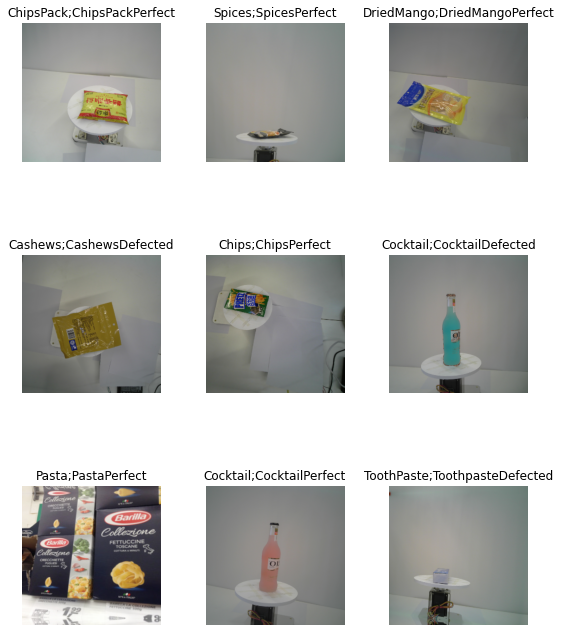

In [ ]:
data.show_batch(rows=3, figsize=(8,10))
print(f"""Classes in our data: {data.classes}\n
Number of classes: {data.c}\n
Training Dataset Length: {len(data.train_ds)}\n
Validation Dataset Length: {len(data.valid_ds)}""")                                                                                                  #Change the torch version if this throws warnings

In [ ]:
# Intitaially fastai library sets all the layers frozen (i.e Resnet50 has the pretrained weights) requires_grad=False 

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2) 
learn = cnn_learner(data, models.vgg16_bn, metrics=acc_02, model_dir='models')

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [ ]:
# learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       1,792      False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
Conv2d               [64, 256, 256]       36,928     False     
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
___________________________________________________

In [ ]:
learn.fit_one_cycle(2) # Training only the lastlayer (i.e fully connected layer)

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.501821,0.065329,0.986738,18:39
1,0.132676,0.046700,0.988304,18:13


In [ ]:
model1 = learn.save('stage-1-VGG16')
torch.save(model1 , "vgg16_1")

In [ ]:
learn.unfreeze() #requires_grad=True (All weights from frozen layers of the model now can get updated from their pre-trained state according to loss function.)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


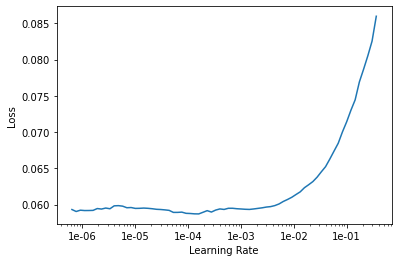

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
# learn.lr_find()

In [ ]:
"""Using discriminative learning rates here(parameter max_lr), 
which maintains a low learning rate for initial layers as they need lesser tuning 
and gradually increase learning rate for later layers which need higher tuning especially fully connected ones."""

learn.fit_one_cycle(2, slice(3e-5, 5e-4))

epoch,train_loss,valid_loss,accuracy_thresh,time


epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.050977,0.034958,0.990847,20:41
1,0.041002,0.030091,0.992016,20:42


In [ ]:
#use lr_find() before fit_one_cycle() to get best suited learning rate for underlying data.

In [ ]:
model2 = learn.save('stage-2-vgg16')
torch.save(model2 , 'vgg16_2')

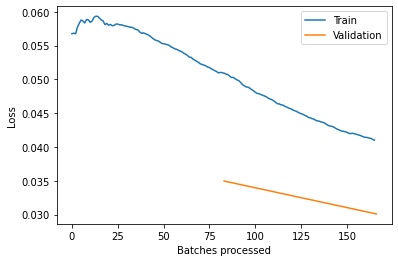

In [ ]:
learn.recorder.plot_losses()

In [ ]:
# If you need to load a model
# learn.load('models/stage-2-rn50')

In [ ]:
"Prediction Test"

In [ ]:
learn = load_learner('models', 
                     test=ImageList.from_folder('Files/CoolDrinks')) #loading from training set as an example only
preds,_ = learn.get_preds(ds_type=DatasetType.Test)